<font size="5">TensorFlow basic - Linear Regression</font>
1. Prepare the data
2. Build the model
3. Set the criterion
4. Train the model
5. Visualize the result


# Regression (in lecture slides, Linear) - boston housing data

In [2]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import warnings
warnings.filterwarnings('ignore')

Instructions for updating:
non-resource variables are not supported in the long term


In [3]:
x_data = datasets.load_boston().data[:,12]
y_data = datasets.load_boston().target 
df = pd.DataFrame([x_data, y_data]).transpose()
df.head()

,0,1
0,4.98,24.0
1,9.14,21.6
2,4.03,34.7
3,2.94,33.4
4,5.33,36.2


## Bulid the model
Gradient Descent : θ초기화

In [7]:
w = tf.Variable(tf.random_normal([1])) # 가중치, parameter θ, [1]: 값 하나만 꺼내줘, tf.Variable(초기화 방법)
b = tf.Variable(tf.random_normal([1]))

y_predicted = w * x_data + b # model

## Set the criterion
Cost function(loss) & Gradient Descent method

In [6]:
loss = tf.reduce_mean(tf.square(y_predicted - y_data)) # square:거듭제곱
optimizer = tf.train.GradientDescentOptimizer(0.001)  # 0.001 : learning rate
train = optimizer.minimize(loss)                      # train만 run!

## Train the model 

In [5]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer()) # tf.Variable 초기화
    
    for step in range(10000): # epoch, iteration
        sess.run(train) # 실제로 Gradient Descent가 실행되는 코드
        if step % 1000 == 0: # interval
            print('Step {}: w{} b{}'.format(step, sess.run(w), sess.run(b)))
            print('loss {}'.format(sess.run(loss)))
            print()
            
    w_out, b_out = sess.run([w, b])

2022-06-28 10:10:12.636934: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Step 0: w[1.2588954] b[0.9964176]
loss 318.2610168457031

Step 1000: w[0.2960371] b[13.79861]
loss 142.39198303222656

Step 2000: w[-0.1796127] b[21.721191]
loss 78.2049331665039

Step 3000: w[-0.47369966] b[26.619602]
loss 53.66775131225586

Step 4000: w[-0.6555303] b[29.648233]
loss 44.287723541259766

Step 5000: w[-0.7679526] b[31.520777]
loss 40.70198059082031

Step 6000: w[-0.8374621] b[32.67855]
loss 39.33123779296875

Step 7000: w[-0.8804384] b[33.394375]
loss 38.80724334716797

Step 8000: w[-0.90700996] b[33.83696]
loss 38.606929779052734

Step 9000: w[-0.92343765] b[34.110588]
loss 38.53036117553711



## Visualize the result

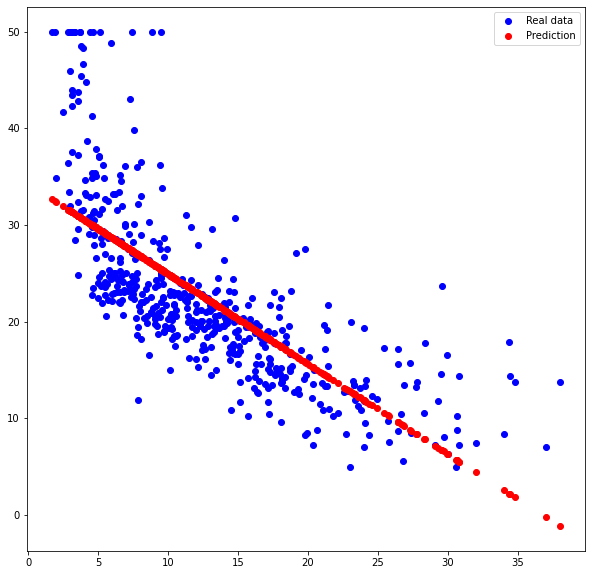

In [7]:
plt.figure(figsize=(10,10))
plt.plot(x_data, y_data, 'bo', label = 'Real data')
plt.plot(x_data, x_data*w_out + b_out, 'ro', label = 'Prediction') # Prediction = x_data*w_out + b_out
plt.legend()
plt.show()

----

# Regression (in lecture slides, 1-layer NN)

## Prepare the data

In [8]:
x_data = datasets.load_boston().data[:,12]
y_data = datasets.load_boston().target 

df = pd.DataFrame([x_data, y_data]).transpose()
df.head()

,0,1
0,4.98,24.0
1,9.14,21.6
2,4.03,34.7
3,2.94,33.4
4,5.33,36.2


## Build the model

In [9]:
_x_data = tf.reshape(x_data, [len(x_data), 1])

W = tf.Variable(tf.random_normal([1, 5], dtype = tf.float64))
W_out = tf.Variable(tf.random_normal([5, 1], dtype = tf.float64))

hidden = tf.nn.sigmoid(tf.matmul(_x_data, W))
output = tf.matmul(hidden, W_out)    # Prediction = output

## Set the criterion
Cost function(loss) & Gradient Descent method

In [10]:
loss = tf.reduce_mean(tf.square(output - y_data))
optimizer = tf.train.GradientDescentOptimizer(0.001) # lr
train = optimizer.minimize(loss) 

## Train the model


In [11]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for step in range(50000):
        sess.run(train)
        if step % 5000 == 0:
            print('Step {} || Loss : {}'.format(step, sess.run(loss)))
    
    output = sess.run(output)

2022-06-28 15:59:47.224743: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Step 0 || Loss : 590.3042316074258
Step 5000 || Loss : 84.44998610362157
Step 10000 || Loss : 84.43886334316566
Step 15000 || Loss : 84.433892367363
Step 20000 || Loss : 84.43103035667663
Step 25000 || Loss : 84.42915535411383
Step 30000 || Loss : 84.42782569574146
Step 35000 || Loss : 84.42683065180621
Step 40000 || Loss : 84.42605639364525
Step 45000 || Loss : 84.4254358189411


## Visualize the result


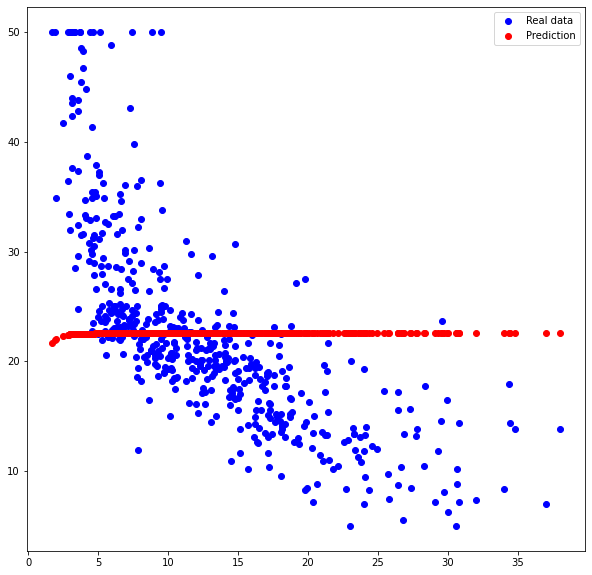

In [45]:
plt.figure(figsize=(10, 10))
plt.plot(x_data, y_data, 'bo', label = 'Real data')
plt.plot(x_data, output, 'ro', label = 'Prediction')  # Prediction = output
plt.legend()
plt.show()

----

# Regression (in lecture slides, 2-layers NN)

## Prepare the data

In [9]:
x_data = datasets.load_boston().data[:,12]
y_data = datasets.load_boston().target 

df = pd.DataFrame([x_data, y_data]).transpose()
df.head()

,0,1
0,4.98,24.0
1,9.14,21.6
2,4.03,34.7
3,2.94,33.4
4,5.33,36.2


## Build the model
Networ(Neural network architercture)

In [27]:
_x_data = tf.reshape(x_data, [len(x_data), 1])  # placeholder
_y_data = tf.reshape(y_data, [len(y_data), 1])

W1 = tf.Variable(tf.random_normal([1, 5], dtype = tf.float64))
W2 = tf.Variable(tf.random_normal([5, 10], dtype = tf.float64))
W_out = tf.Variable(tf.random_normal([10, 1], dtype = tf.float64))

hidden1 = tf.nn.elu(tf.matmul(_x_data, W1))
hidden2 = tf.nn.elu(tf.matmul(hidden1, W2))
output = tf.matmul(hidden2, W_out) # Regression, Prediction

## Set the criterion
Cost function(loss) & Gradient Descent method

In [30]:
loss = tf.losses.mean_squared_error(output, _y_data) # Cost function(loss) 
optimizer = tf.train.AdamOptimizer(0.001) # lr:0.001 # optimizer( Gradient Descent method)
train = optimizer.minimize(loss) # train만 run! 

## Train the model

In [31]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for step in range(50000):
        sess.run(train) # train, test
        if step % 5000 == 0:
            print('Step {} || Loss : {}'.format(step, sess.run(loss)))
    
    output = sess.run(output)

Step 0 || Loss : 6498.83935546875
Step 5000 || Loss : 202.7757110595703
Step 10000 || Loss : 107.73607635498047
Step 15000 || Loss : 54.98625946044922
Step 20000 || Loss : 37.42253112792969
Step 25000 || Loss : 30.416248321533203
Step 30000 || Loss : 28.549800872802734
Step 35000 || Loss : 27.674436569213867
Step 40000 || Loss : 27.334928512573242
Step 45000 || Loss : 27.185670852661133


## Visualize the result

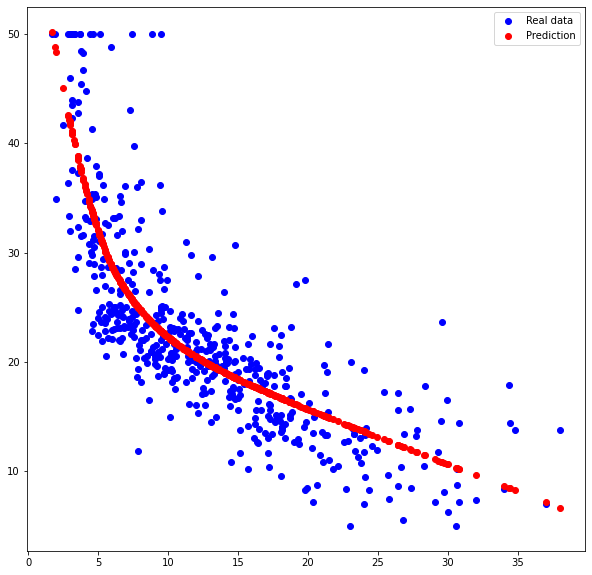

In [32]:
plt.figure(figsize=(10, 10))
plt.plot(x_data, y_data, 'bo', label = 'Real data')
plt.plot(x_data, output, 'ro', label = 'Prediction')  # Prediction = output
plt.legend()
plt.show()